# **Crop prediction wrt temperature and what effect does climate change has on the crops**

**EDA and Label Encoding**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
data = pd.read_csv('/content/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.dropna()
data.shape

(2200, 8)

In [ ]:
x = data.drop('label', axis=1)
labelencoder = LabelEncoder()
label = data['label'].values
encoded_label = labelencoder.fit_transform(label)

In [ ]:
data['labelEncoded'] = labelencoder.fit_transform(data.label.values)
data.head()
labelencoder_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(labelencoder_name_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,labelEncoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [ ]:
corr = data.drop('labelEncoded', axis=1).corr()
corr.style.background_gradient()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


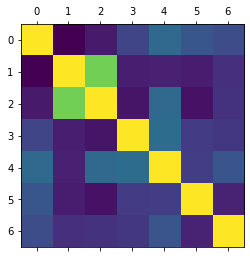

In [ ]:
plt.matshow(corr)
plt.show()

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("\n")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("\n")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']


Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']


Rainy Crops
['rice' 'papaya' 'coconut']


# KMeans to cluster together similar crops

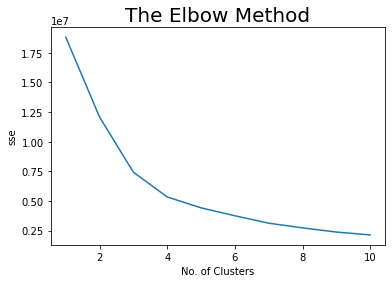

In [ ]:
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('sse')
plt.show()

In [ ]:
n_clusters = 4
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("\n")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("\n")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("\n")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


Crops in Third Cluster: ['grapes' 'apple']


Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


# Logistic Regression Model for normal conditions to predict crops

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, data.labelEncoded, test_size=0.8, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

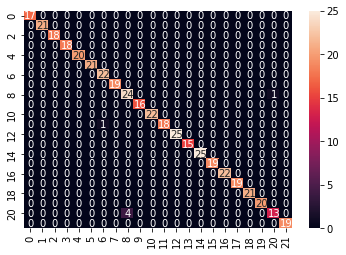

In [ ]:
y_pred_train = model.predict(X_train)
conf_mat = confusion_matrix(y_train, y_pred_train)
sns.heatmap(conf_mat, annot=True)

In [ ]:
print(classification_report(y_train, y_pred_train))
print('Train Accuracy Score: ',accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00        19
           8       0.86      0.96      0.91        25
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        22
          11       1.00      0.95      0.97        19
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00        25
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        22
          17       1.00    

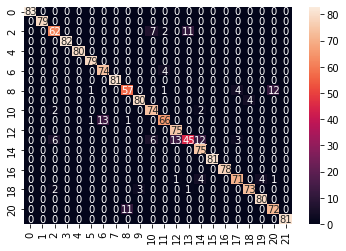

In [ ]:
y_pred_test = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_mat, annot=True)

In [ ]:
print(classification_report(y_test, y_pred_test))
print('Test Accuracy Score: ', accuracy_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        79
           2       0.86      0.76      0.81        82
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        80
           5       0.98      1.00      0.99        79
           6       0.85      0.95      0.90        78
           7       1.00      1.00      1.00        81
           8       0.83      0.76      0.79        75
           9       0.96      0.95      0.96        84
          10       0.85      0.95      0.90        78
          11       0.90      0.81      0.86        81
          12       0.84      1.00      0.91        75
          13       0.79      0.53      0.63        85
          14       0.81      1.00      0.89        75
          15       1.00      1.00      1.00        81
          16       1.00      1.00      1.00        78
          17       0.91    

# Model tested on increased temperatures due to Global Warming

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       0.89      0.80      0.84       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       0.98      1.00      0.99       100
           6       0.87      0.96      0.91       100
           7       1.00      1.00      1.00       100
           8       0.84      0.81      0.82       100
           9       0.97      0.96      0.96       100
          10       0.88      0.96      0.92       100
          11       0.92      0.84      0.88       100
          12       0.88      1.00      0.93       100
          13       0.83      0.60      0.70       100
          14       0.85      1.00      0.92       100
          15       1.00      1.00      1.00       100
          16       1.00      1.00      1.00       100
          17       0.93    

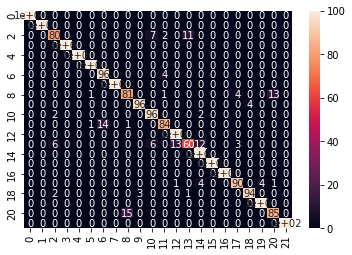

In [ ]:
y_pred_normal = model.predict(data.drop(['label', 'labelEncoded'], axis=1))
y = data.labelEncoded
conf_mat = confusion_matrix(y, y_pred_normal)
sns.heatmap(conf_mat, annot=True)
print(classification_report(y, y_pred_normal))
print('Accuracy Score(Normal): ', accuracy_score(y, y_pred_normal))

In [ ]:
data['temperature'] = data["temperature"].apply(lambda x:x+random.uniform(1,10))
# data['humidity'] = data["humidity"].apply(lambda x:x-random.uniform(1,5))

In [ ]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,labelEncoded
0,90,42,43,30.564853,82.002744,6.502985,202.935536,rice,20
1,85,58,41,23.990003,80.319644,7.038096,226.655537,rice,20
2,60,55,44,31.217405,82.320763,7.840207,263.964248,rice,20
3,74,35,40,30.323660,80.158363,6.980401,242.864034,rice,20
4,78,42,42,25.369456,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,29.407144,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,29.365894,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,32.762854,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,35.417167,52.127394,6.758793,127.175293,coffee,5


In [ ]:
X = data.drop(['label', 'labelEncoded'], axis=1)
y = data.labelEncoded

In [ ]:
y_pred_temp_inc = model.predict(X)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100
           2       0.89      0.59      0.71       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       0.95      1.00      0.98       100
           6       0.88      0.96      0.92       100
           7       1.00      1.00      1.00       100
           8       0.75      0.87      0.81       100
           9       1.00      0.88      0.94       100
          10       0.97      0.73      0.83       100
          11       0.93      0.84      0.88       100
          12       0.79      1.00      0.88       100
          13       0.54      0.80      0.65       100
          14       0.88      1.00      0.94       100
          15       1.00      1.00      1.00       100
          16       1.00      1.00      1.00       100
          17       0.93    

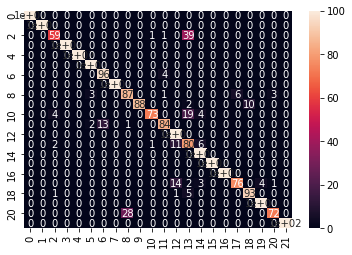

In [ ]:
conf_mat = confusion_matrix(y, y_pred_temp_inc)
sns.heatmap(conf_mat, annot=True)
print(classification_report(y, y_pred_temp_inc))
print('Accuracy Score(Increased Temp): ', accuracy_score(y, y_pred_temp_inc))